In [7]:
from __future__ import (absolute_import, print_function, division)
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy
from scipy.stats import multivariate_normal as mvn
from numpy.linalg import inv
from numpy import log as ln
from numpy.random import random as rand
%matplotlib inline

**Some useful definitions that describes my usage below**

numpy.random.random

numpy.random.random(size=None)
Return random floats in the half-open interval [0.0, 1.0).

Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a multiply the output of random_sample by (b-a) and add a:

(b - a) * random_sample() + a
Parameters:	
size : int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
Returns:	
out : float or ndarray of floats
Array of random floats of shape size (unless size=None, in which case a single float is returned).
Examples

>>>
>>> np.random.random_sample()
0.47108547995356098
>>> type(np.random.random_sample())
<type 'float'>
>>> np.random.random_sample((5,))
array([ 0.30220482,  0.86820401,  0.1654503 ,  0.11659149,  0.54323428])
Three-by-two array of random numbers from [-5, 0):

>>>
>>> 5 * np.random.random_sample((3, 2)) - 5
array([[-3.99149989, -0.52338984],
       [-2.99091858, -0.79479508],
       [-1.23204345, -1.75224494]])
scipy.stats.multivariate_normal

scipy.stats.multivariate_normal = <scipy.stats._multivariate.multivariate_normal_gen object at 0x2b45d3298990>[source]
A multivariate normal random variable.

The mean keyword specifies the mean. The cov keyword specifies the covariance matrix.

New in version 0.14.0.

Parameters:	
x : array_like
Quantiles, with the last axis of x denoting the components.
mean : array_like, optional
Mean of the distribution (default zero)
cov : array_like, optional
Covariance matrix of the distribution (default one)
Alternatively, the object may be called (as a function) to fix the mean
and covariance parameters, returning a “frozen” multivariate normal
random variable:
rv = multivariate_normal(mean=None, scale=1)
Frozen object with the same methods but holding the given mean and covariance fixed.
Notes

Setting the parameter mean to None is equivalent to having mean be the zero-vector. The parameter cov can be a scalar, in which case the covariance matrix is the identity times that value, a vector of diagonal entries for the covariance matrix, or a two-dimensional array_like.

The covariance matrix cov must be a (symmetric) positive semi-definite matrix. The determinant and inverse of cov are computed as the pseudo-determinant and pseudo-inverse, respectively, so that cov does not need to have full rank.

The probability density function for multivariate_normal is

$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)$ ,

where \mu is the mean, \Sigma the covariance matrix, and k is the dimension of the space where x takes values.

Methods

**pdf(x, mean=None, cov=1)**	Probability density function.
logpdf(x, mean=None, cov=1)	Log of the probability density function.
rvs(mean=None, cov=1)	Draw random samples from a multivariate normal distribution.
entropy()	Compute the differential entropy of the multivariate normal.

# Expectatiton Maximization Steps for EMM-GMM from Lecture 9 Notes

In [19]:
def EM_GMM(x_train,k,T):
    n, d = x_train.shape
    # phi_i as in phi_i(j) in the lecture notes
    phi_i = rand((n,k))      
    # pi as in discrete distro pi in lecture notes
    pi_j = np.ones(k)
    mu_j = asarray([rand(d) for i in xrange(k)])
    lambda_j = asarray([np.diag(rand(d)) for i in xrange(k)])
    likelihood_list = list()
    mvpdf = mvn.pdf
    for t in range(T):
        # E-Step
        for j in range(k):
            for i, xi in enumerate(x_train.values):
                phi_i[i,j] = pi_j[j] * mvn.pdf(xi, mu_j[j], inv(lambda_j[j])) 
                
        phi_i = phi_i / np.sum(phi_i,axis=1).reshape((n,1)) 
        # M-Step
        n_j = np.sum(phi_i,axis=0)
        for j in range(k):
            mu_j[j] = (1.0/n_j[j]) * np.sum(phi_i[:,j].reshape((n,1)) * x_train.values ,axis=0)
                    
        for j in range(k):
            phixmuxT = np.zeros((d,d))    
            for i, xi in enumerate(x_train.values):
                xminusmu = (xi- mu_j[j]).reshape((d,1))
                phixmuxT += phi_i[i][j] * xminusmu.dot(xminusmu.T)
            lambda_j[j]= inv( (1/n_j[j]) *phixmuxT )
        pi_j = n_j / np.sum(n_j)
        lnp=0
        for i, xi in enumerate(x_train.values):
            px=0
            for j in range(k):
                px+=pi_j[j]*mvpdf(xi, mean=mu_j[j], cov=inv(lambda_j[j]))
            lnp+=ln(px)        
        likelihood_list.append(lnp)
    return phi_i, mu_j, pi_j, lambda_j, n_j,likelihood_list

def llkplot(dlist,k):
    myplot = plt.figure()
    plt.plot(dlist[k][5])
    plt.title('EM for Gaussian Mixture Model with K='+k[5:])
    plt.grid()
#     myplot.savefig(inpth+'HMWK4_Q1b_'+k+'.png')
    
def scatplot(dlist, x_train,k):
    cluster = [i.argmax() for i in dlist[k][0]]
    myplot = plt.figure()
    plt.scatter(x_train[0].values,x_train[1].values,c=cluster,s=40)
    plt.title('Scatter plot for Gaussian Mixture Model with K='+k[5:])
    plt.grid()
#     myplot.savefig(inpth+'HMWK4_Q1c_'+k+'.png')

In [16]:
def llkplot(dlist,k):
    myplot = plt.figure()
    plt.plot(dlist[k][5])
    plt.title('EM for Gaussian Mixture Model with K='+k[5:])
    plt.grid()
#     myplot.savefig(inpth+'HMWK4_Q1b_'+k+'.png')
    
def scatplot(dlist, xtrn,k):
    cluster = [i.argmax() for i in dlist[k][0]]
    myplot = plt.figure()
    plt.scatter(xtrn[0].values,xtrn[1].values,c=cluster,s=40)
    plt.title('Scatter plot for Gaussian Mixture Model with K='+k[5:])
    plt.grid()
#     myplot.savefig(inpth+'HMWK4_Q1c_'+k+'.png')

In [17]:
if __name__ == '__main__':
    inpth = '/Users/arkilic/Desktop/'
    xtrn =pd.read_csv(inpth+'data.txt',header=None)
    emgmms= {}
#     for k in (2,4,8,10):
#         emgmms["emgmm%d" % k ]= EM_GMM(xtrn,k,100)
    emgmms["emgmm%d" % 2 ]= EM_GMM(xtrn,2,100)

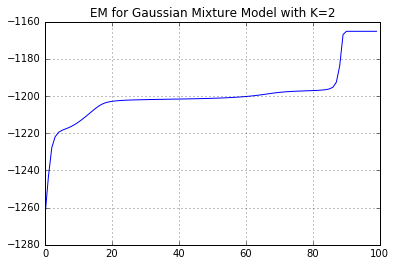

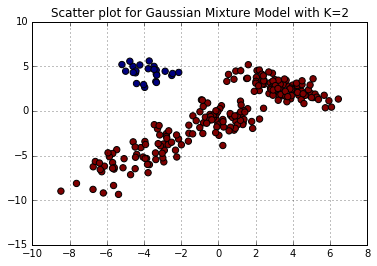

In [18]:
    for egm in emgmms:
            llkplot(emgmms,egm)
            scatplot(emgmms,xtrn,egm)